In [148]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from IPython.display import display

In [149]:
# Reading data
data_path = "supermarket_sales.csv"
data = pd.read_csv(data_path)

# show data 
print("Data size: ", data.shape)
display(data.head())

# show information about the data 
print("Data info:\n")
data.info()

Data size:  (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin 

### Parsing date and time 

In [150]:
# Check date entries (How long they are)
(data["Date"].str.len()).value_counts()

9    677
8    323
Name: Date, dtype: int64

Okay, seems that all dates have the same format of %m/%d/%Y

In [151]:
# Parsing dates 
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")

data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

# droping the Date Column 
# data.drop("Date", axis=1, inplace=True)

# show data 
display(data.head())
data.info()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [152]:
# parsing time 
data["Time"] = pd.to_datetime(data["Time"], format="%H:%M")

data["Hour"] = data["Time"].dt.hour

# droping the Time Column 
data.drop("Time", axis=1, inplace=True)

# show data 
display(data.head())
data.info()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [153]:
# show data descriptive statistics 
print("Data descriptive statistics:\n")
display(data.describe())

Data descriptive statistics:



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,1.993000,15.256000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,0.835254,8.693563,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,1.000000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,2.000000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,3.000000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,3.000000,31.000000,20.000000


In [154]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Year                          1
Month                         3
Day                          31
Hour                         11
dtype: int64

In [156]:
cols = [col for col in data.columns if data[col].nunique()<=50] 

print("Unique values in the columns:\n ")
for col in cols:
    print(f"{col}: {data[col].unique()} \n")

Unique values in the columns:
 
Branch: ['A' 'C' 'B'] 

City: ['Yangon' 'Naypyitaw' 'Mandalay'] 

Customer type: ['Member' 'Normal'] 

Gender: ['Female' 'Male'] 

Product line: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] 

Quantity: [ 7  5  8  6 10  2  3  4  1  9] 

Payment: ['Ewallet' 'Cash' 'Credit card'] 

gross margin percentage: [4.76190476] 

Year: [2019] 

Month: [1 3 2] 

Day: [ 5  8  3 27 25 24 10 20  6  9 12  7 29 15 11  1 21 17  2 22 28 23  4 16
 19 14 13 26 18 30 31] 

Hour: [13 10 20 18 14 11 17 16 19 15 12] 



In [157]:
# dropping unnecessary variables
data.drop(["gross margin percentage", "Year"], axis=1, inplace=True)
print(f"Data size: {data.shape}")
display(data.head())

Data size: (1000, 18)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,2,8,10


### Getting insights about the total income for each branch in each month  

In [158]:
branch_A = data[data["Branch"]=="A"]
branch_B = data[data["Branch"]=="B"]
branch_C = data[data["Branch"]=="C"]

In [159]:
def total_var_per_month(df, col):
    total_var = []
    for i in range(1, 4):
        total_var.append(df[df["Month"] == i][col].sum())
    return total_var

In [160]:
total_A1, total_A2, total_A3 = total_var_per_month(branch_A, "Total")

total_B1, total_B2, total_B3 = total_var_per_month(branch_B, "Total")

total_C1, total_C2, total_C3 = total_var_per_month(branch_C, "Total")

total_branch = pd.DataFrame({
    "Branch": ["A", "A", "A", "B", "B", "B", "C", "C", "C"],
    "Month": [1, 2, 3, 1, 2, 3, 1, 2, 3],
    "Total": [total_A1, total_A2, total_A3, 
              total_B1, total_B2, total_B3,
              total_C1, total_C2, total_C3]
}
)
display(total_branch)

,Branch,Month,Total
0,A,1,38681.1285
1,A,2,29860.1205
2,A,3,37659.1215
3,B,1,37176.0585
4,B,2,34424.2710
5,B,3,34597.3425
6,C,1,40434.6810
7,C,2,32934.9825
8,C,3,37199.0430


<AxesSubplot: xlabel='Month', ylabel='Total'>

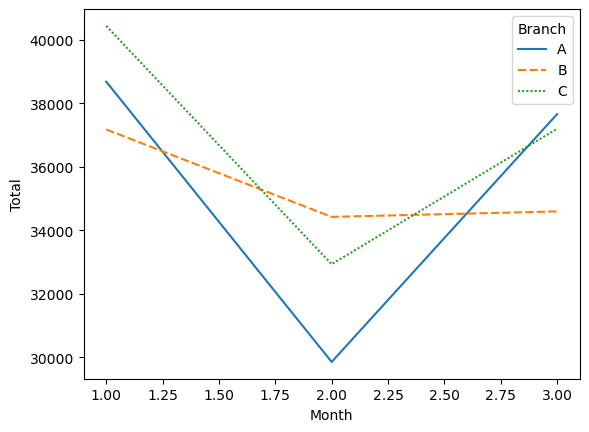

In [161]:
sns.lineplot(data=total_branch, x='Month', y="Total", hue="Branch", style="Branch")

Month 2 has drops in all branches 

### Getting insights about the total gross income for each branch in each month  

In [162]:
total_gross_A1, total_gross_A2, total_gross_A3 = total_var_per_month(branch_A, "gross income")

total_gross_B1, total_gross_B2, total_gross_B3 = total_var_per_month(branch_B, "gross income")

total_gross_C1, total_gross_C2, total_gross_C3 = total_var_per_month(branch_C, "gross income")

total_branch["total gross income"] = pd.Series(data=np.array([total_gross_A1, total_gross_A2, total_gross_A3,
                                                              total_gross_B1, total_gross_B2, total_gross_B3,
                                                              total_gross_C1, total_gross_C2, total_gross_C3]))
display(total_branch)

,Branch,Month,Total,total gross income
0,A,1,38681.1285,1841.9585
1,A,2,29860.1205,1421.9105
2,A,3,37659.1215,1793.2915
3,B,1,37176.0585,1770.2885
4,B,2,34424.2710,1639.2510
5,B,3,34597.3425,1647.4925
6,C,1,40434.6810,1925.4610
7,C,2,32934.9825,1568.3325
8,C,3,37199.0430,1771.3830


<AxesSubplot: xlabel='Month', ylabel='total gross income'>

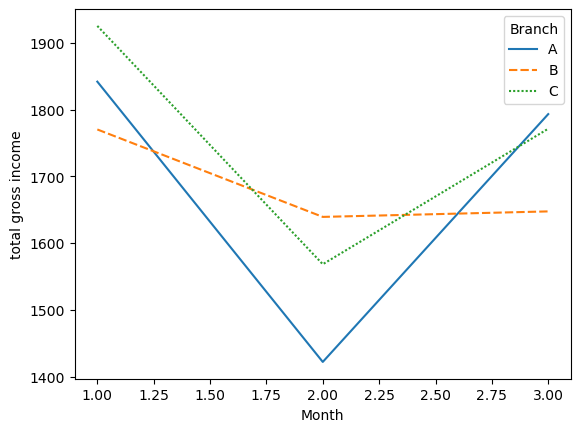

In [163]:
sns.lineplot(data=total_branch, x='Month', y="total gross income", hue="Branch", style="Branch")

### Get insghts about males and females who doing shopping  

Text(0.5, 1.0, 'Gender count')

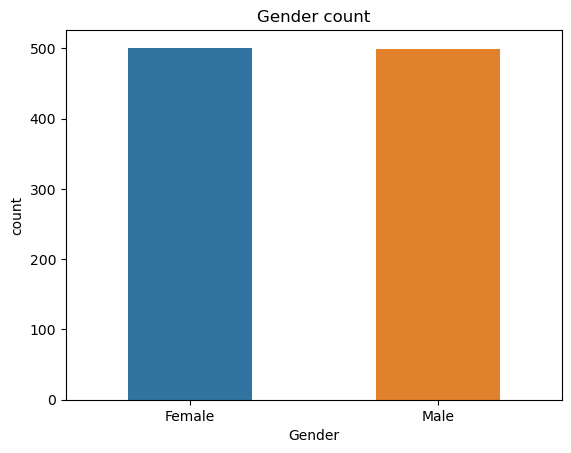

In [164]:
sns.countplot(data, x="Gender", width=.5)
plt.title("Gender count")

Text(0.5, 1.0, 'Gender count by Product line')

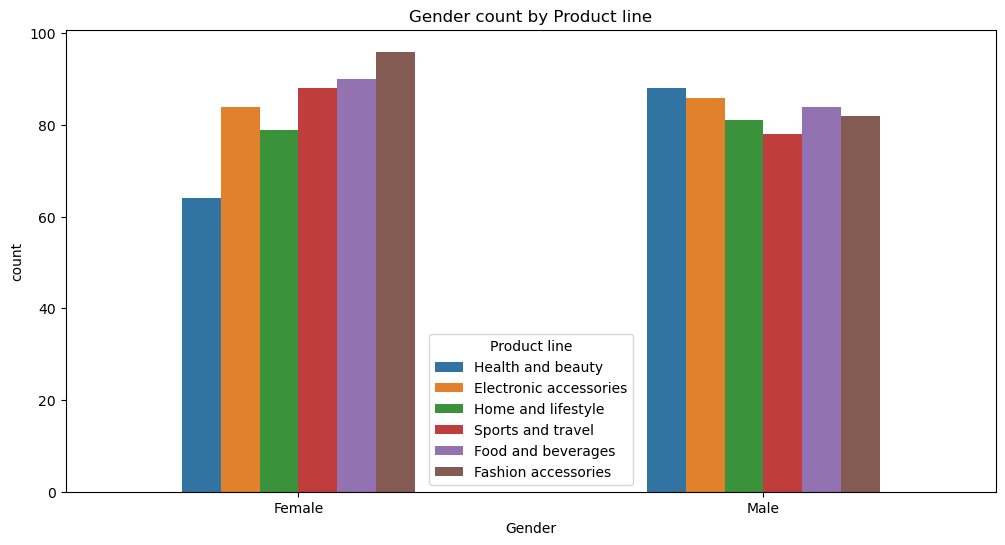

In [168]:
plt.figure(figsize=(12, 6))
sns.countplot(data, x="Gender", hue="Product line", width=.5)
plt.title("Gender count by Product line")

We see that females products in "Sports and travel", "Food and beverages" and "Fashion accessories" product lines are more than males

### Get insghts about the branch ratings 

<Figure size 2100x600 with 0 Axes>

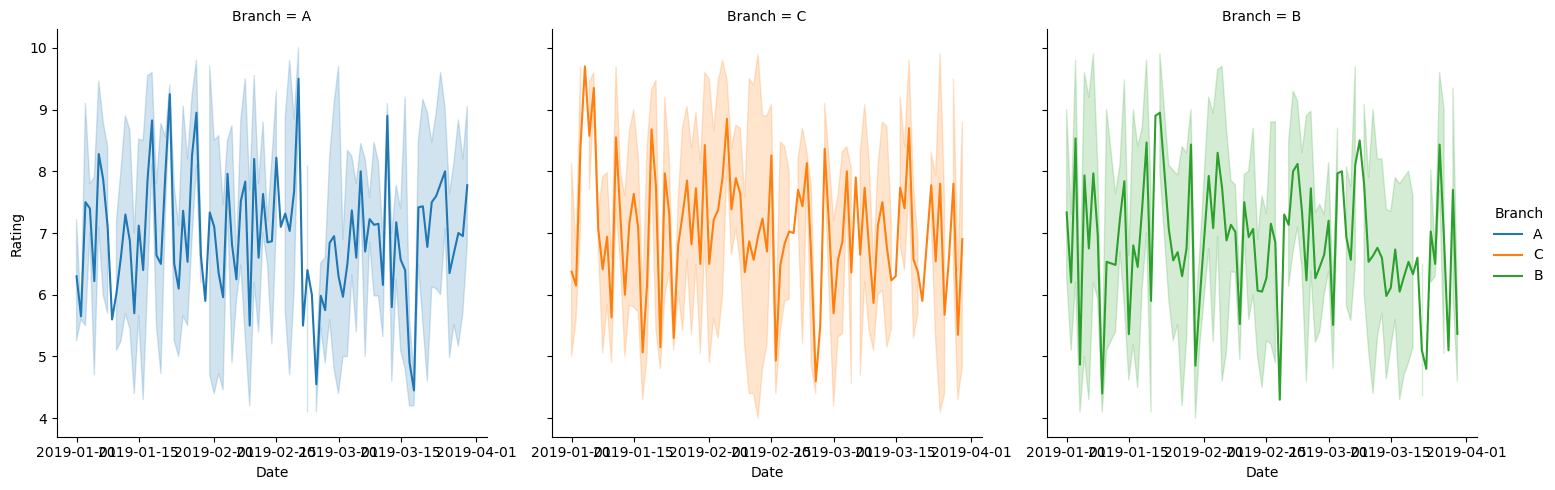

In [187]:
plt.figure(figsize=(21, 6))
sns.relplot(data, x="Date", y="Rating", hue="Branch", col="Branch", kind="line")

In [193]:
# get average rating per month

def avg_var_per_month(df, col):
    total_var = []
    for i in range(1, 4):
        total_var.append(df[df["Month"] == i][col].mean())
    return total_var

avg_rating_A1, avg_rating_A2, avg_rating_A3 = avg_var_per_month(branch_A, "Rating")

avg_rating_B1, avg_rating_B2, avg_rating_B3 = avg_var_per_month(branch_B, "Rating")

avg_rating_C1, avg_rating_C2, avg_rating_C3 = avg_var_per_month(branch_C, "Rating")

total_branch["avg rating"] = pd.Series(data=np.array([avg_rating_A1, avg_rating_A2, avg_rating_A3,
                                                      avg_rating_B1, avg_rating_B2, avg_rating_B3,
                                                      avg_rating_C1, avg_rating_C2, avg_rating_C3]))
display(total_branch)

,Branch,Month,Total,total gross income,avg rating
0,A,1,38681.1285,1841.9585,7.078151
1,A,2,29860.1205,1421.9105,7.007447
2,A,3,37659.1215,1793.2915,6.993701
3,B,1,37176.0585,1770.2885,6.801802
4,B,2,34424.2710,1639.2510,7.008257
5,B,3,34597.3425,1647.4925,6.649107
6,C,1,40434.6810,1925.4610,7.154918
7,C,2,32934.9825,1568.3325,7.200000
8,C,3,37199.0430,1771.3830,6.858491


<AxesSubplot: xlabel='Month', ylabel='avg rating'>

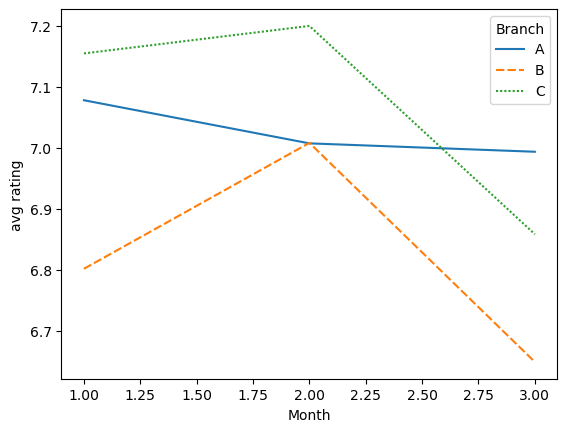

In [194]:
sns.lineplot(data=total_branch, x='Month', y="avg rating", hue="Branch", style="Branch")

<Figure size 2100x600 with 0 Axes>

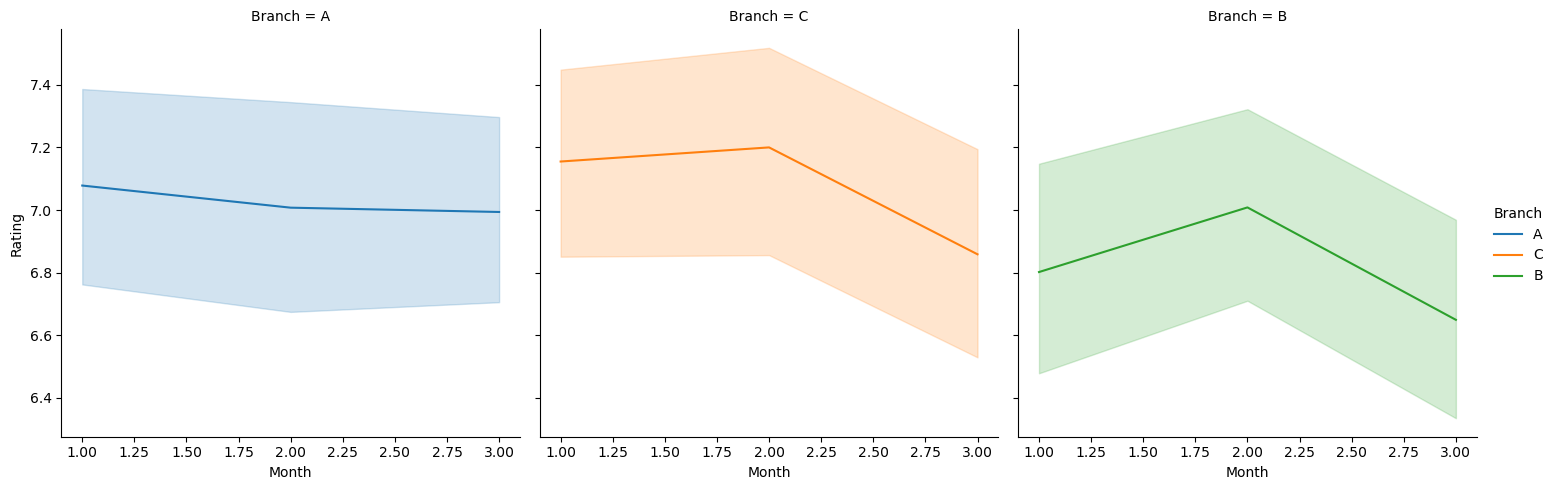

In [195]:
plt.figure(figsize=(21, 6))
sns.relplot(data, x="Month", y="Rating", hue="Branch", col="Branch", kind="line")

<AxesSubplot: xlabel='Rating', ylabel='Branch'>

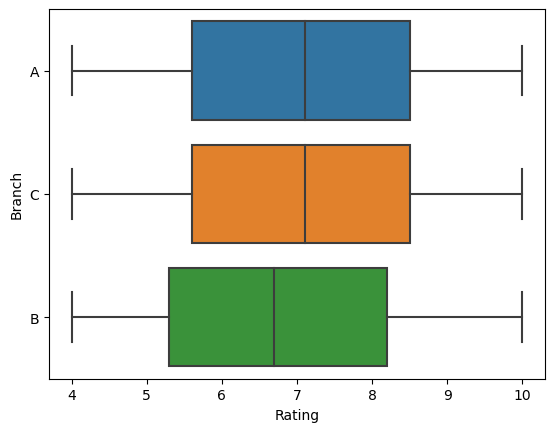

In [196]:
sns.boxplot(data, x="Rating", y="Branch")

Branch B has the lowest rating 

### Get insghts about the rush hour at the 3 branches during the 3 months 

Text(0.5, 1.0, 'Quatities sold per hours')

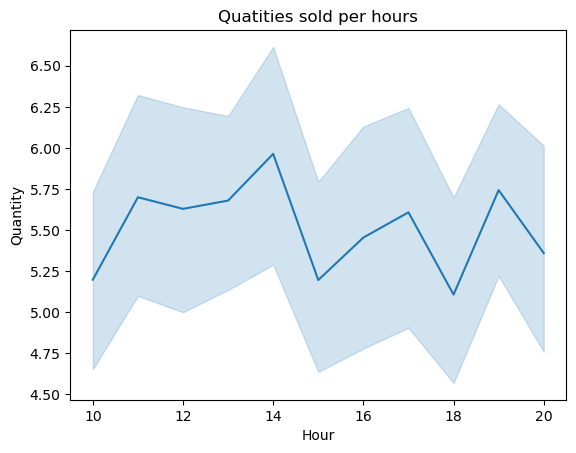

In [203]:
# rush hour at the company 
sns.lineplot(data, x="Hour", y="Quantity")
plt.title("Quatities sold per hours")

The rush horu is almost 14:00 at the company

<Figure size 2100x600 with 0 Axes>

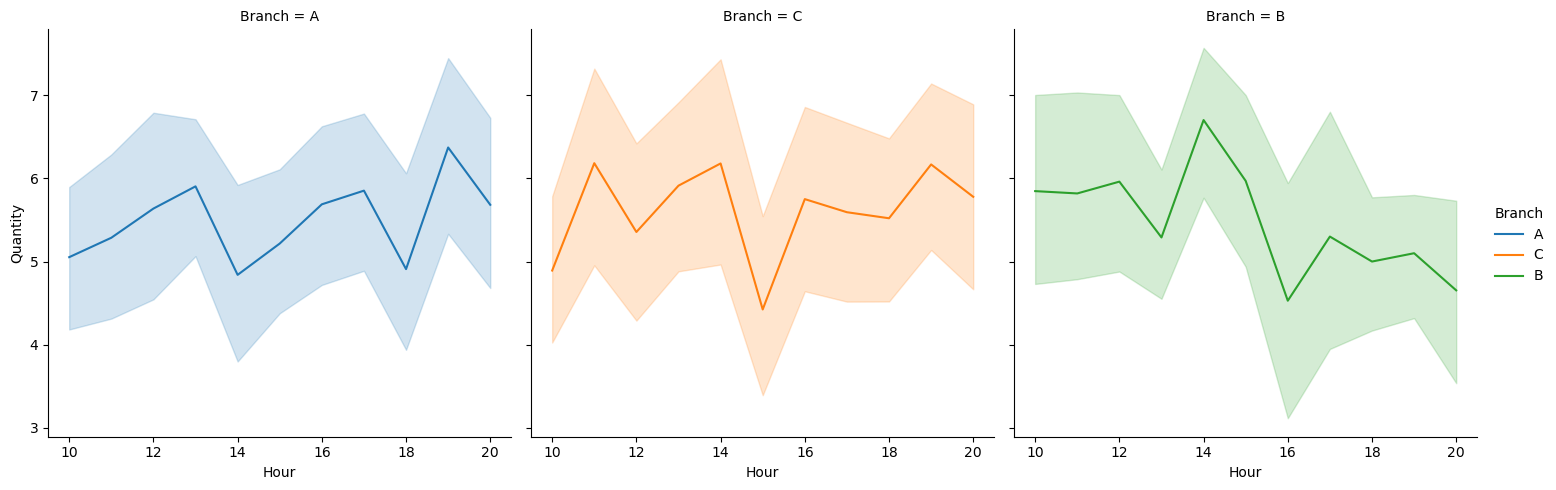

In [204]:
# rush hour per branch 
plt.figure(figsize=(21, 6))
sns.relplot(data, x="Hour", y="Quantity", hue="Branch", col="Branch", kind="line")

Branch A has rush hour at 19:00, 
and Branch B and C have rush hour at 14:00

<Figure size 2100x600 with 0 Axes>

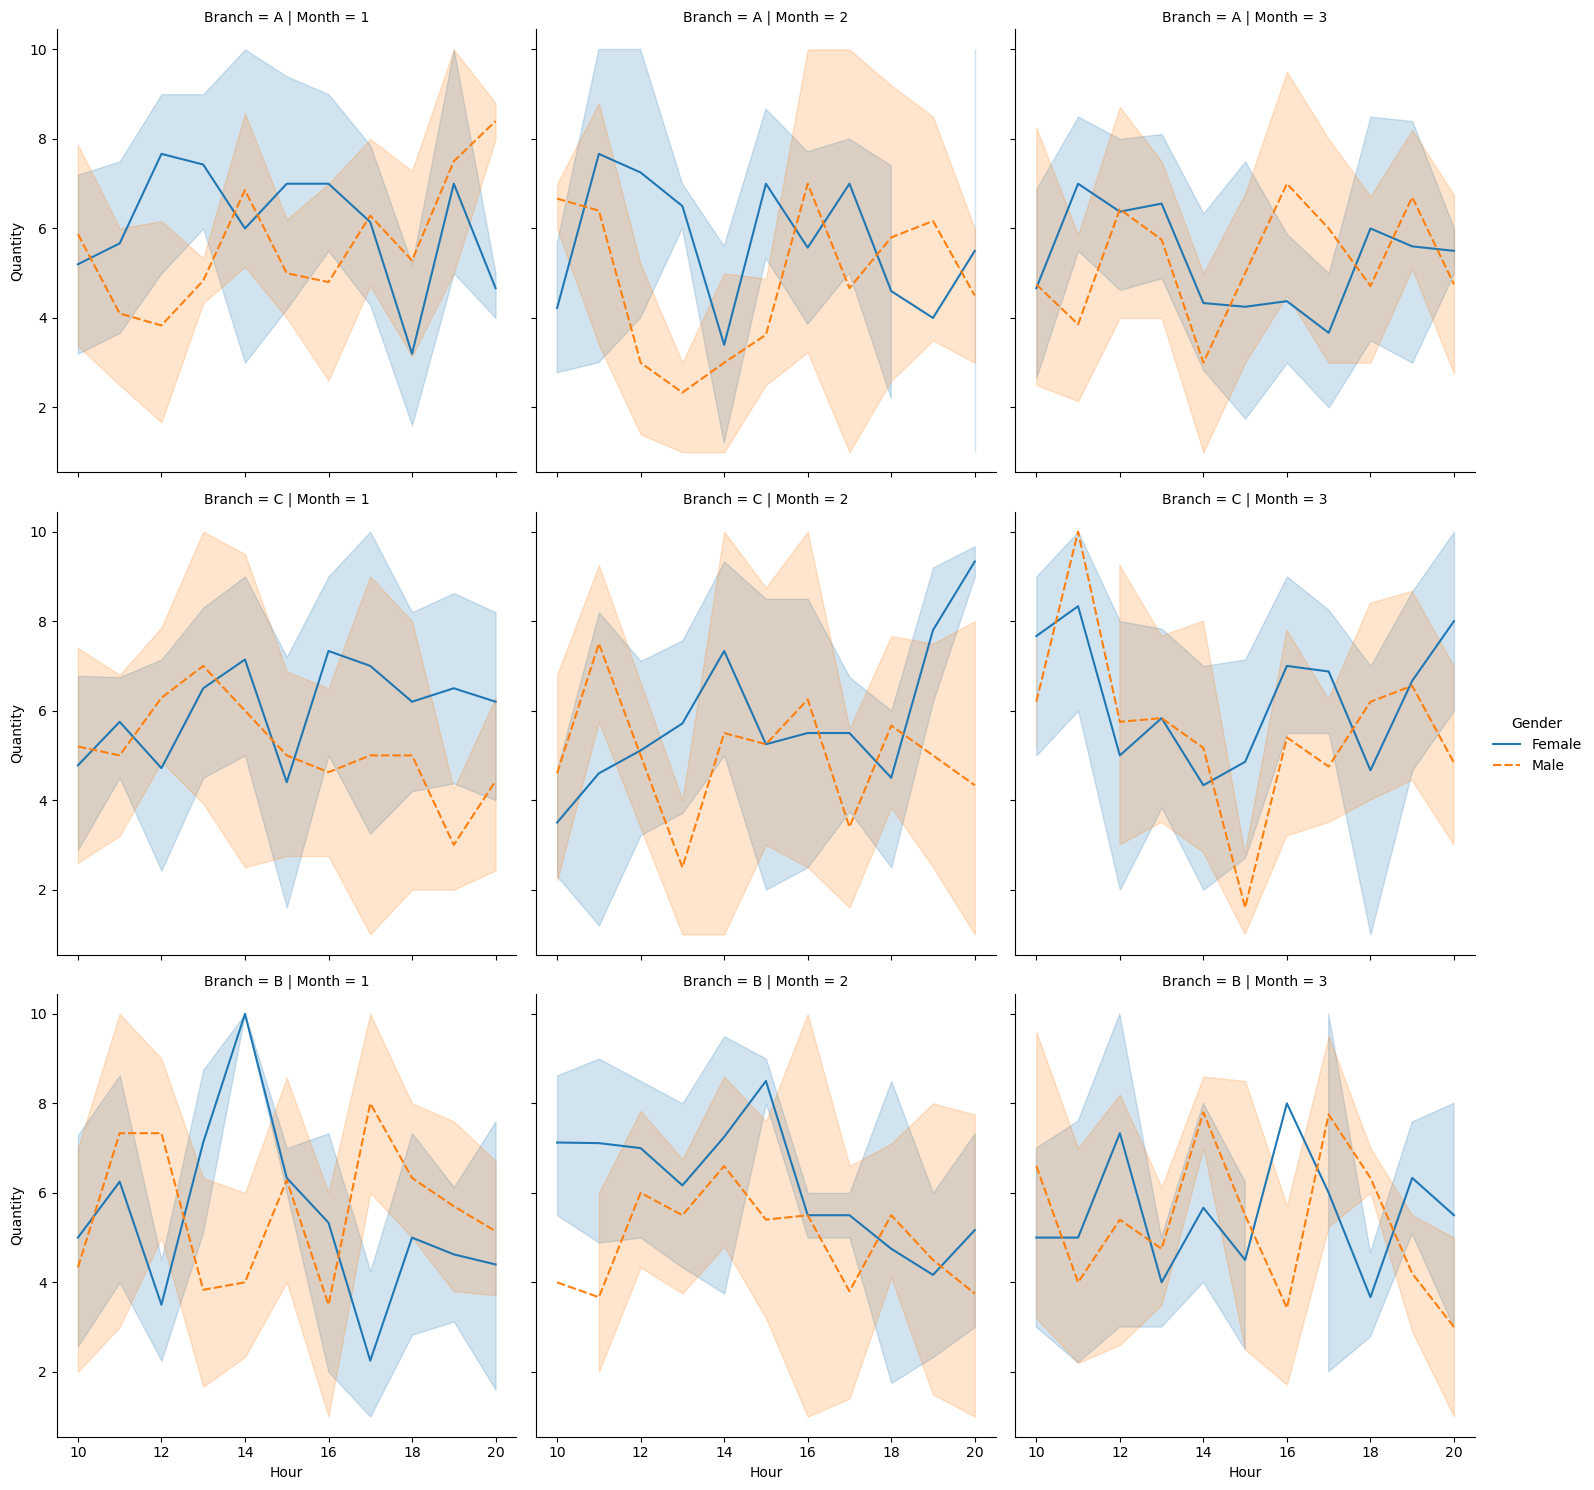

In [207]:
# rush hour per branch per month for each gender
plt.figure(figsize=(21, 6))
sns.relplot(data, x="Hour", y="Quantity", hue="Gender", row="Branch", col="Month", kind="line", style="Gender")